<a href="https://colab.research.google.com/github/shi5a/Data-Science-Bootcamp/blob/main/ML_W3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Members :


Shaikha AlBilais

Sarah Alhugail

Eatidal Almutairi

Hailah Alharthi

# Decision Tree Assignment

#### Deleverables
- EDA 
    - Tell / show me about your data
    - Etc...
- Data prep / wrangling
    - pick & prep your features
    - [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Etc...
- Model
    - Import and make a [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - Bonus: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [RandomizedSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Bonus: [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - Explain what's going on..
- Score your model
    - Accuracy
    - Confusion matrix
    - Etc...
- Display your decision tree with [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (or similar)
    - Explain your tree
    - Etc...

# EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import *
sns.set_palette('Set2')
from sklearn.metrics import confusion_matrix



df = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/airlines.parquet')

df.tail()

,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
3999995,0,1987.0,10.0,5.0,1.0,740.0,747.0,7.0,821.0,71.0,11.0,150.0,332.0,0.0
3999996,0,1990.0,7.0,28.0,6.0,955.0,1055.0,14.0,103.0,54.0,167.0,22.0,321.0,0.0
3999997,0,1987.0,11.0,28.0,6.0,1715.0,1741.0,3.0,1098.0,32.0,133.0,8.0,108.0,0.0
3999998,0,1991.0,8.0,26.0,1.0,1215.0,1335.0,14.0,103.0,66.0,27.0,149.0,395.0,0.0
3999999,0,1990.0,7.0,26.0,4.0,925.0,934.0,7.0,1051.0,80.0,69.0,96.0,288.0,0.0


In [ ]:
df.shape

(4000000, 14)

Target is `ArrDelayBinary`.

In [ ]:
df.ArrDelayBinary.value_counts()

0    3307255
1     692745
Name: ArrDelayBinary, dtype: int64

In [ ]:
df.drop(['Diverted'],axis=1, inplace=True)

In [ ]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')


,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance
ArrDelayBinary,1.000000,-0.039272,-0.002223,0.005156,-0.000750,0.082825,0.094130,-0.000891,-0.029227,0.160840,-0.006576,0.005935,0.078803
t_Year,-0.039272,1.000000,-0.269420,-0.012871,-0.005014,-0.014622,0.001554,0.037195,0.086398,0.058492,0.005759,0.005791,0.043229
t_Month,-0.002223,-0.269420,1.000000,-0.002716,0.001590,-0.000680,-0.002221,-0.024098,-0.006826,-0.006849,-0.006664,-0.005636,-0.001868
DayofMonth,0.005156,-0.012871,-0.002716,1.000000,-0.001764,-0.001560,-0.001289,-0.000340,0.000859,-0.000216,0.000109,-0.000260,-0.000328
DayofWeek,-0.000750,-0.005014,0.001590,-0.001764,1.000000,0.004130,0.006393,-0.012153,0.003607,0.006683,-0.000124,0.000702,0.012555
CRSDepTime,0.082825,-0.014622,-0.000680,-0.001560,0.004130,1.000000,0.815022,0.011877,0.017228,-0.047227,-0.032341,0.014777,-0.051439
CRSArrTime,0.094130,0.001554,-0.002221,-0.001289,0.006393,0.815022,1.000000,-0.003438,0.006861,0.057020,0.007145,-0.003114,0.048443
UniqueCarrier,-0.000891,0.037195,-0.024098,-0.000340,-0.012153,0.011877,-0.003438,1.000000,-0.012814,-0.141071,0.087299,0.088300,-0.122382
FlightNum,-0.029227,0.086398,-0.006826,0.000859,0.003607,0.017228,0.006861,-0.012814,1.000000,-0.161535,0.020377,0.025645,-0.167426
ActualElapsedTime,0.160840,0.058492,-0.006849,-0.000216,0.006683,-0.047227,0.057020,-0.141071,-0.161535,1.000000,0.054247,0.076717,0.972644


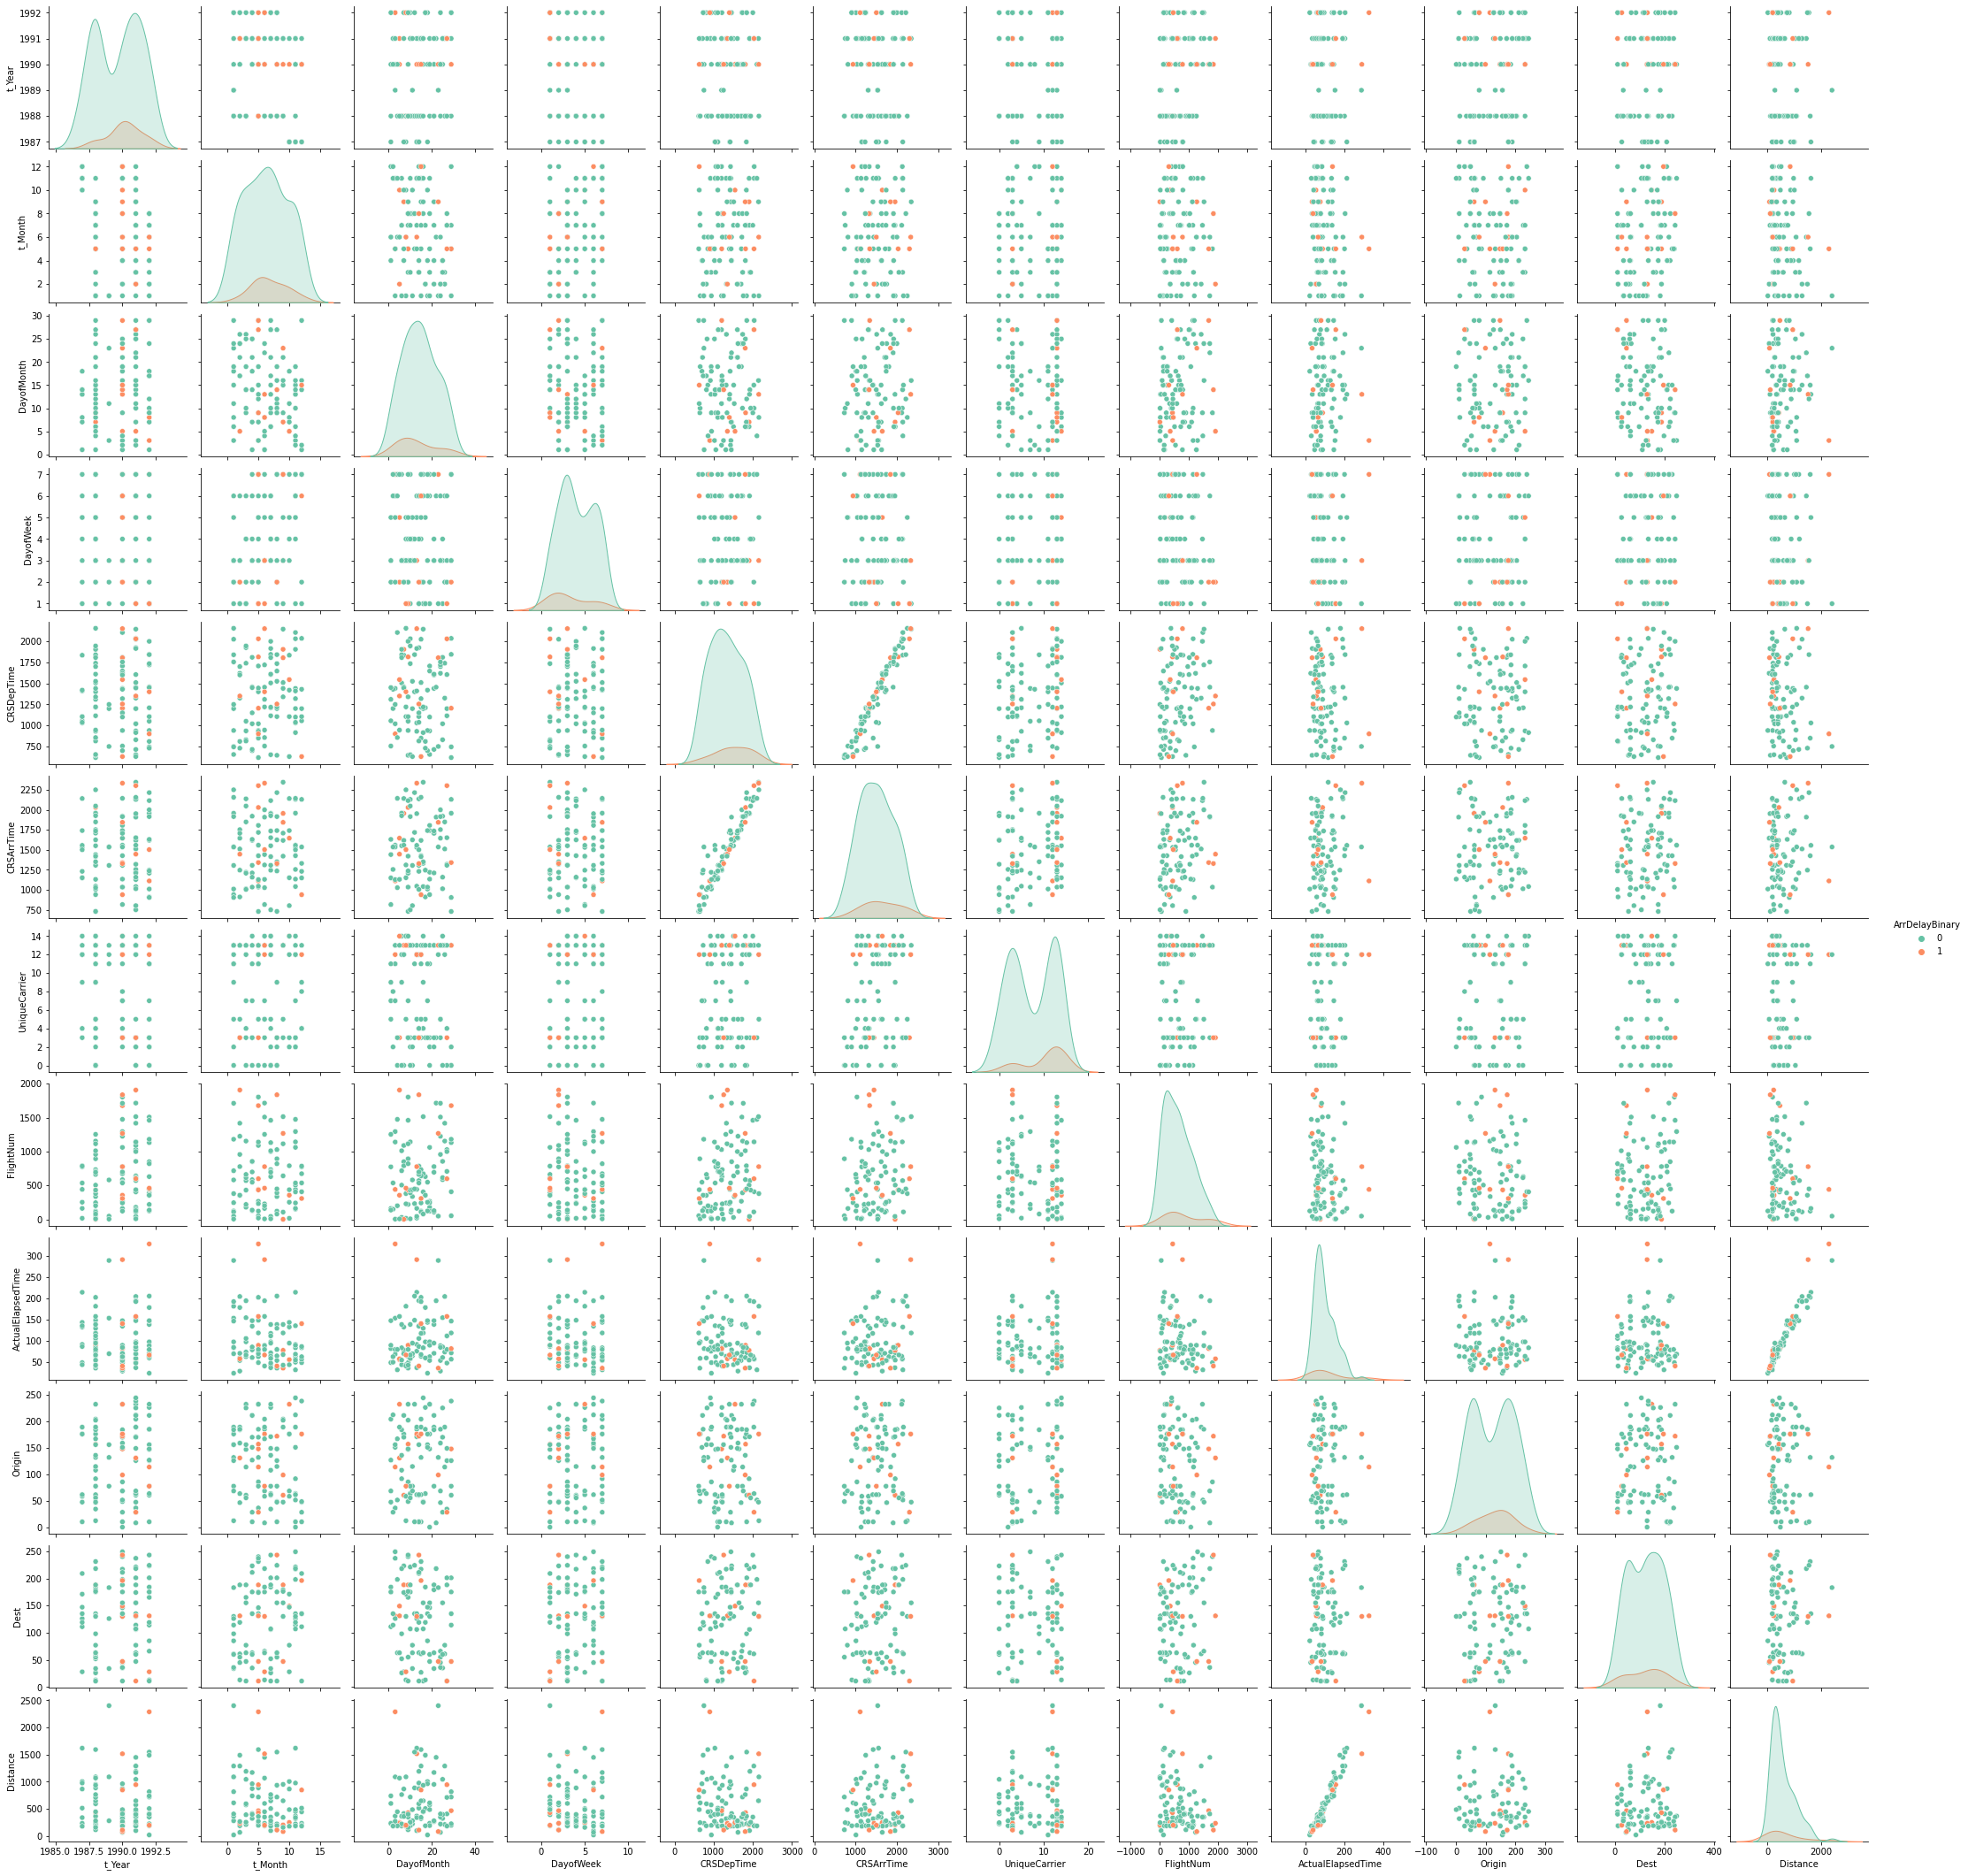

In [ ]:
sns.pairplot(data=df.sample(100) ,hue= 'ArrDelayBinary')

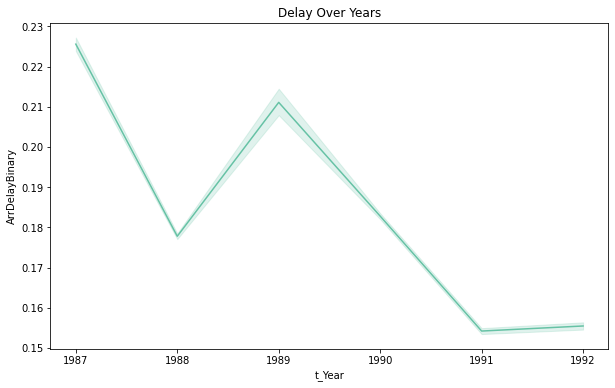

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df, x= 't_Year', y='ArrDelayBinary').set_title('Delay Over Years');


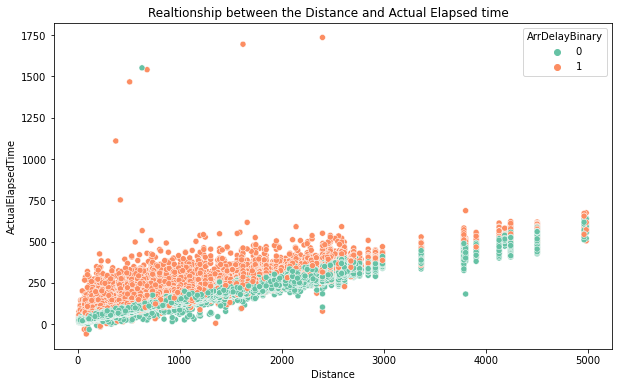

In [ ]:
plt.figure(figsize=(10,6))


sns.scatterplot(x= 'Distance',y= 'ActualElapsedTime',hue='ArrDelayBinary', data = df ).set_title('Realtionship between the Distance and Actual Elapsed time  ');


# Data prep / wrangling

In [ ]:
df.isna().sum()

ArrDelayBinary       0
t_Year               0
t_Month              0
DayofMonth           0
DayofWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
Origin               0
Dest                 0
Distance             0
dtype: int64

### pick & prep your features

In [ ]:
df.columns

Index(['ArrDelayBinary', 't_Year', 't_Month', 'DayofMonth', 'DayofWeek',
       'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'Origin', 'Dest', 'Distance'],
      dtype='object')

In [ ]:
from sklearn.model_selection import  train_test_split
X = df[['ActualElapsedTime','CRSArrTime']]
y = df.ArrDelayBinary

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)


# Baseline model

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class) # what value to predict?

baseline_model(n_predictions, baseline_value)

0         0
1         0
2         0
3         0
4         0
         ..
799995    0
799996    0
799997    0
799998    0
799999    0
Length: 800000, dtype: int64

In [ ]:
n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class)

baseline_preds = baseline_model(n_predictions, baseline_value)

baseline_acc=accuracy_score(y_test, baseline_preds) #Accuracy score of baseline model 
baseline_acc

0.827065

**Here we create a baseline model to compare it with our model, and whene we make prediction the mean we got 0.0.827065 for the accuracy score**

# Model 

Import and make a DecisionTreeClassifier()

In [ ]:
tree = DecisionTreeClassifier(max_depth=5) # we minimize the depth to make the plot more clear , we had accurcy 87% with defult setting

tree.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.feature_importances_


array([0.76181396, 0.23818604])

In [ ]:
preds = tree.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
accuracy_score(y_test, preds)

0.8272225

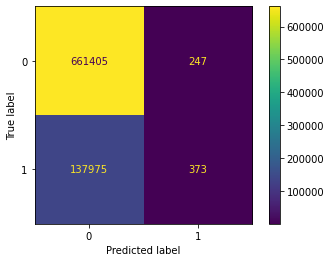

In [ ]:
plot_confusion_matrix(tree, X_test, y_test , values_format='')


### Display your decision tree with plot_tree(), Explain your tree ..

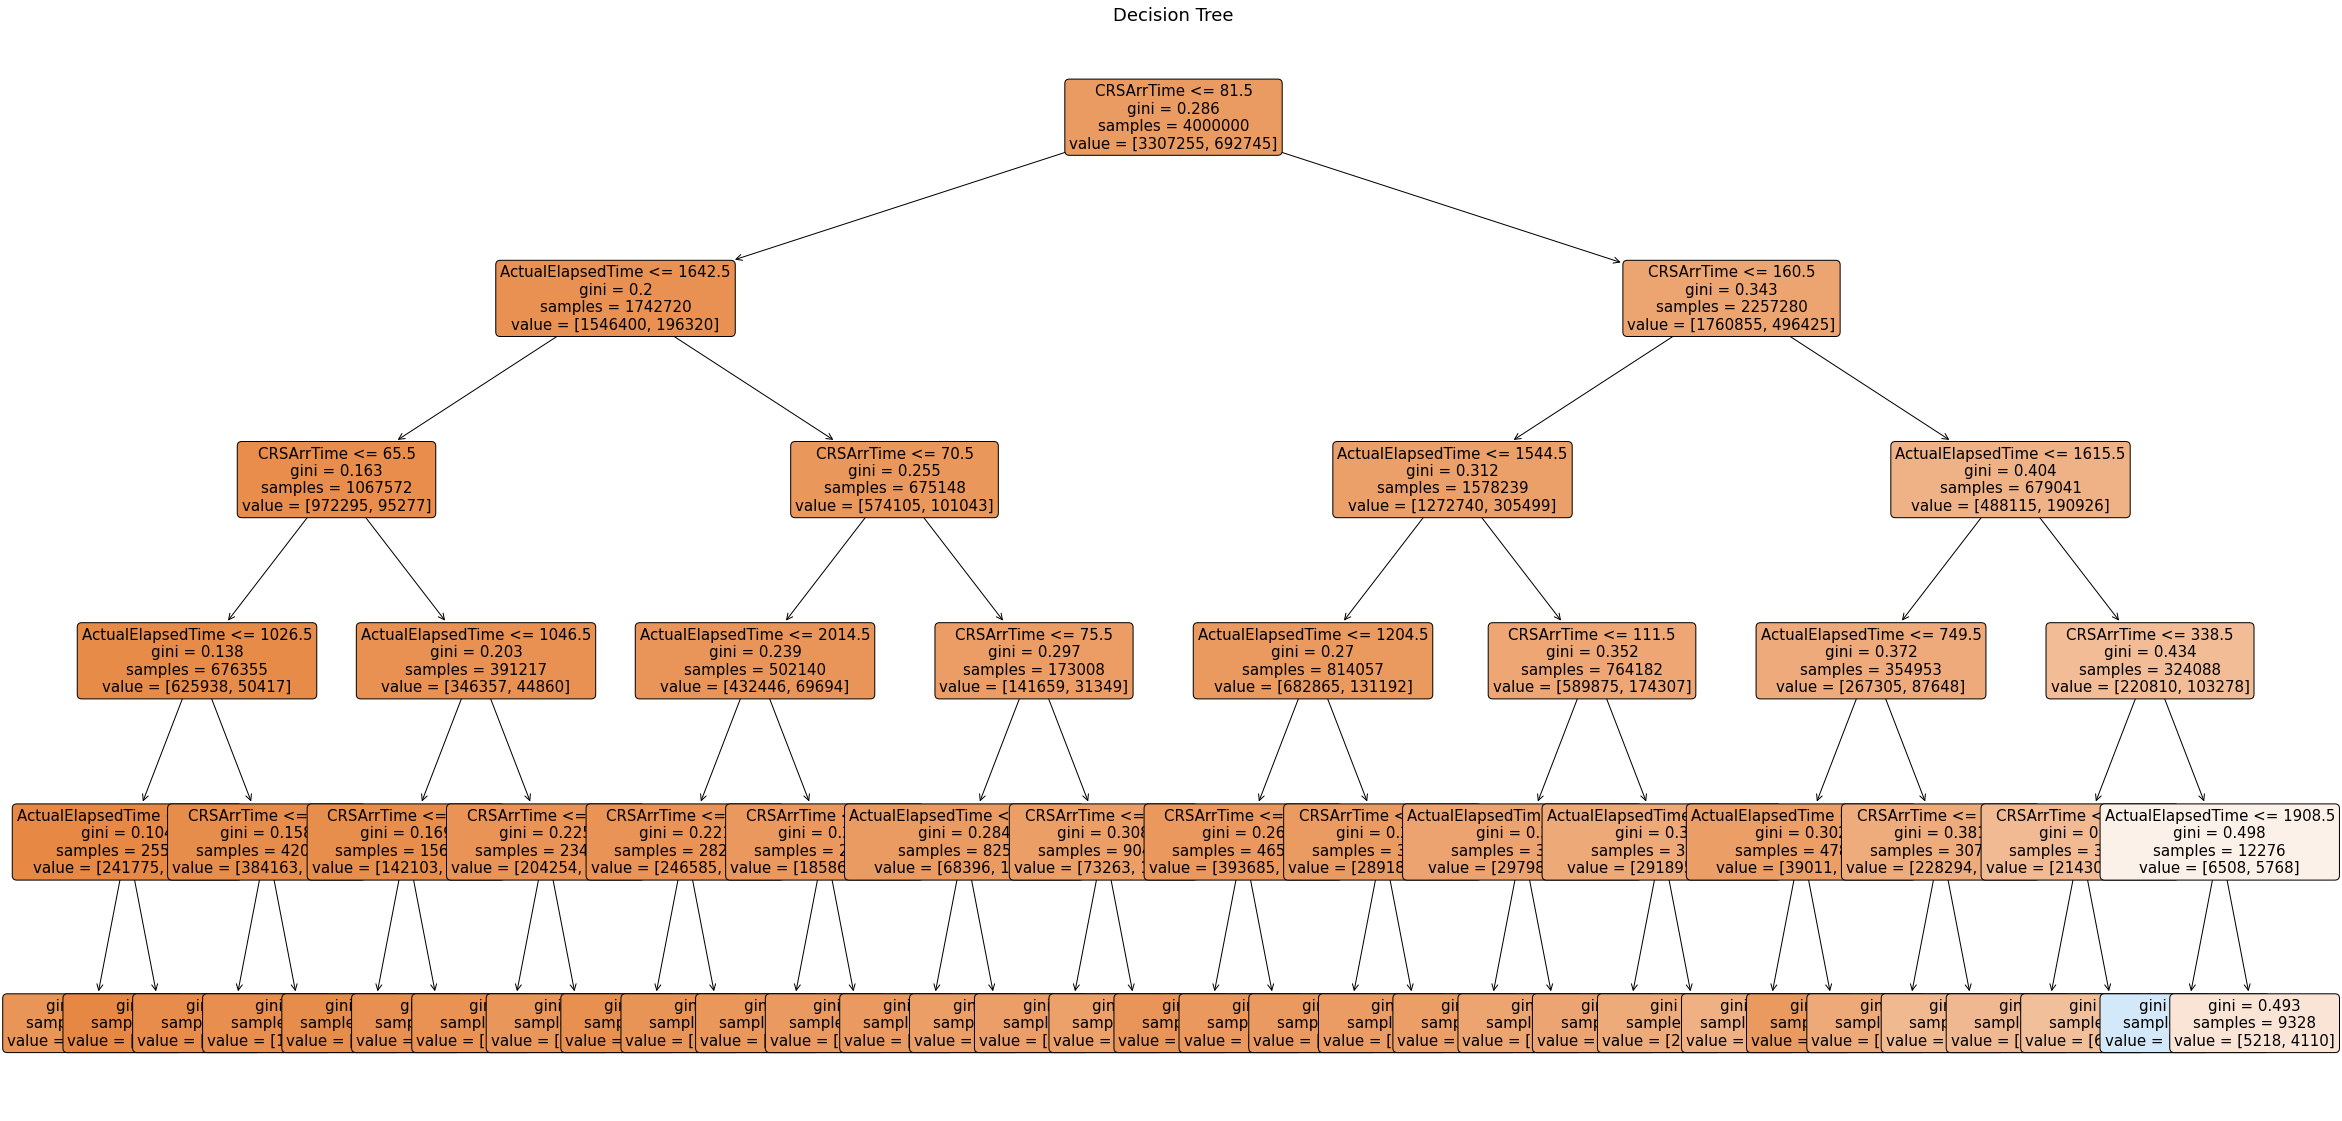

In [ ]:


plt.figure(figsize=(40,20))


plot_tree(tree, feature_names= ['CRSArrTime',  'ActualElapsedTime'],fontsize=15,filled=True, rounded=True);
plt.title('Decision Tree', fontsize=18);



**we minimized the depth to make the plot more clear , we had accurcy 87% with defult setting , As we see CRSarrTime has more effect on decision of the model and we have gini 0.286**

# COMPARING RESULT 

## Compare your results to the baseline
**We got higher accuracy with decision tree models than baseline model**

baseline= 0.827065

decisiontree=0.8272225

 



# Bonus: GridSearchCV() or RandomizedSearchCV()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# distributions = dict( [{'max_depth':depth, 'min_samples_leaf':leaves}])
distributions = dict( max_depth=[2,5,9], min_samples_leaf= [2,4,6])


clf = RandomizedSearchCV(tree,distributions)



In [ ]:
search = clf.fit(X_train, y_train)
search


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
search.best_params_

{'max_depth': 9, 'min_samples_leaf': 2}

In [ ]:
treeS = DecisionTreeClassifier(max_depth=9, min_samples_leaf= 2)

treeS.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
treeS.feature_importances_

array([0.71973473, 0.28026527])

In [ ]:
preds = treeS.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
accuracy_score(y_test, preds)

0.82761875

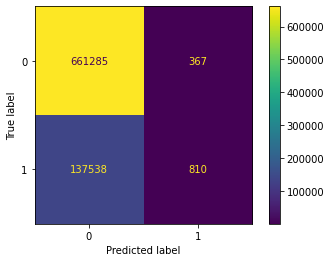

In [ ]:
plot_confusion_matrix(treeS, X_test, y_test , values_format='')


# concluosin :
as we see from previose work our model going forward from high to higher score as we go from baseline to after applying best parameter , even if it was not too signifcant rise .